In [9]:
import mlflow
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Used to avoid printing warnings so we do not see them when
# generating reports as pdf
import warnings
warnings.filterwarnings('ignore')

In [12]:
experiment_metadata = mlflow.search_experiments()

In [13]:
for i in range(len(experiment_metadata)):
    experiment_metadata[i] = dict(experiment_metadata[i])

In [14]:
experiment_metadata = pd.DataFrame.from_dict(experiment_metadata,orient='columns')
#experiment_metadata

In [30]:
experiment_data = mlflow.search_runs(experiment_names=["t_3_500"])

In [33]:
uri = experiment_data.loc[0,"artifact_uri"]

In [29]:
run.info.artifact_uri

NameError: name 'run' is not defined

In [49]:
uri[7:]

'/Users/maherp/Desktop/Universitaet/Goettingen/5_Semester/master_thesis/mctm_pytorch/mlruns/868040026974936212/bb5496f6f46c4654b7f8401a22b62ad1/artifacts'

In [34]:
mlflow.artifacts.load_image(uri)

MlflowException: Unable to form a PIL Image object from file content

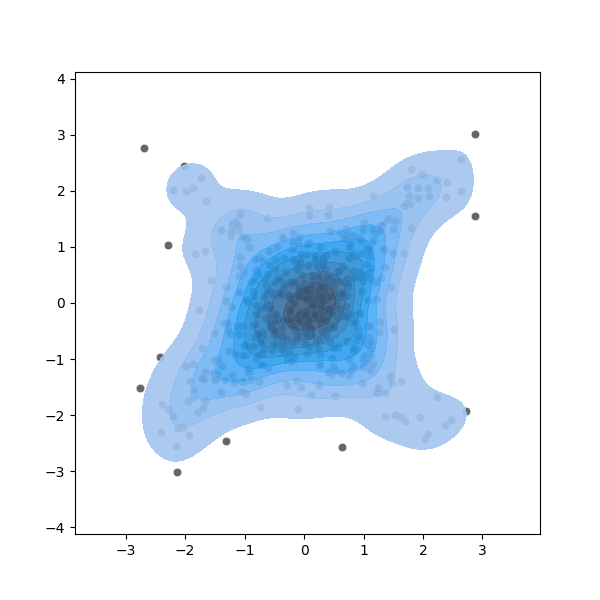

In [51]:
from IPython.display import Image
Image(filename=uri[7:]+'/plot_data_train.png')

In [47]:
uri+'/plot_data_train.png'

'file:///Users/maherp/Desktop/Universitaet/Goettingen/5_Semester/master_thesis/mctm_pytorch/mlruns/868040026974936212/bb5496f6f46c4654b7f8401a22b62ad1/artifacts/plot_data_train.png'

In [43]:
Image(filename="/Users/maherp/Desktop/Universitaet/Goettingen/5_Semester/master_thesis/mctm_pytorch/mlruns/868040026974936212/bb5496f6f46c4654b7f8401a22b62ad1/artifacts/plot_data_train.png")

FileNotFoundError: [Errno 2] No such file or directory: 'file:///Users/maherp/Desktop/Universitaet/Goettingen/5_Semester/master_thesis/mctm_pytorch/mlruns/868040026974936212/bb5496f6f46c4654b7f8401a22b62ad1/artifacts/plot_data_train.png'

#  KL Divergence to the True Model across Train/Test Set for Models and Observations

In [15]:
def plot_kl_boxplot(experiment_data):
    # Need twice as ootherwise we only have one list
    kl_columns = [column for column in experiment_data.columns if "kl" in column]
    kl_columns_and_train_obs = [column for column in experiment_data.columns if "kl" in column]

    kl_columns_and_train_obs.append("tags.train_obs")

    kl_data = experiment_data[kl_columns_and_train_obs]

    kl_data.loc[:,"tags.train_obs"] = pd.to_numeric(kl_data["tags.train_obs"])

    # all cols except tags.train_obs are reformatted intor a vallue and varaible column
    reformatted_kl_data = kl_data.melt(id_vars=['tags.train_obs'])

    # need to sort to have a sorted legend in seaborn plot
    kl_columns.sort()

    sns.set_theme()
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,10),
                                    gridspec_kw={'wspace':0.01, 'hspace':0.0})
    sns.boxplot(
        data=reformatted_kl_data, x="tags.train_obs", y='value', hue="variable",
        hue_order=kl_columns, ax=axs)

    return fig

#### T-Copula


- clear improvement compared to multivariate gaussian model

---
- does not seem to converge to the true model

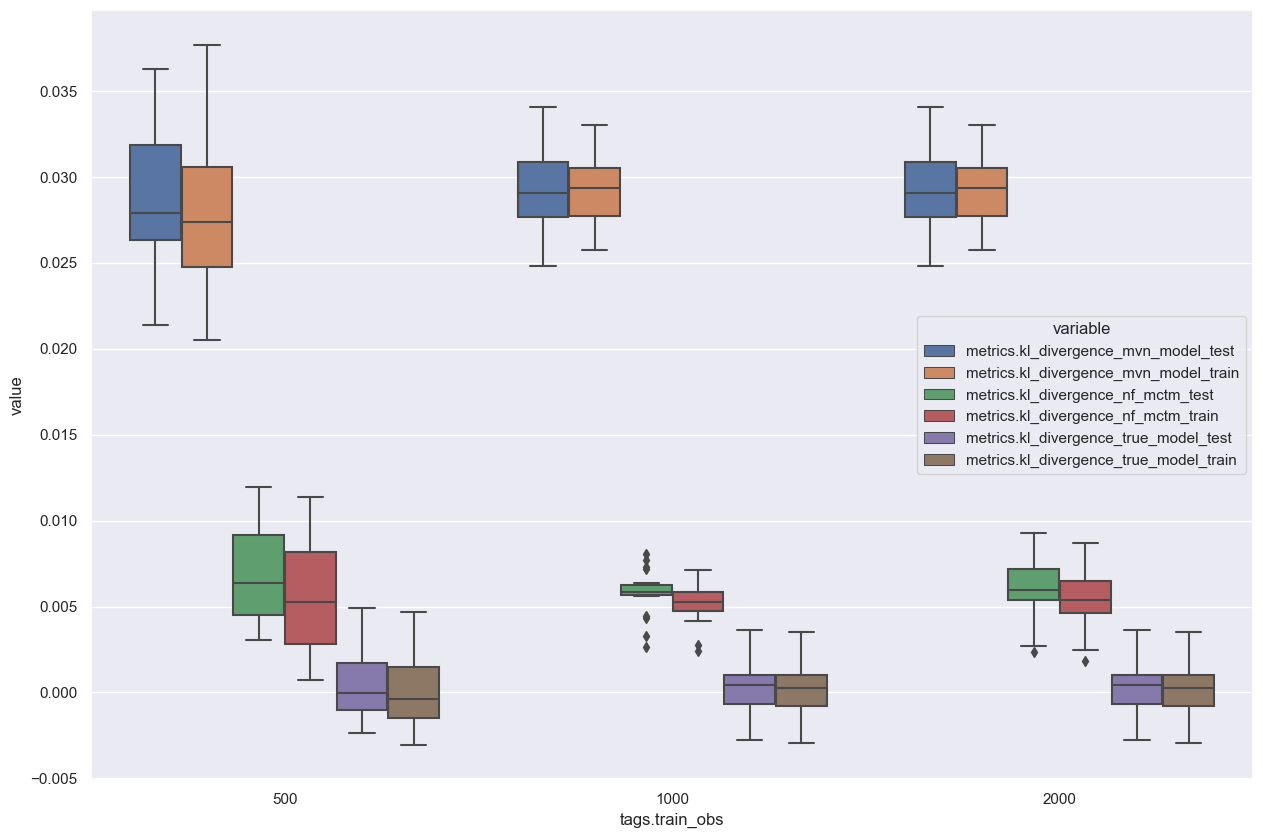

In [16]:
experiment_data = mlflow.search_runs(experiment_names=["t_3_500","t_3_1000","t_3_2000"])

# Incorrect number of observations for the runs of 1000 observations in t copula, I think I didnt push most current model code up to the server
id_t_3_1000 = experiment_metadata[experiment_metadata["name"]=="t_3_1000"]["experiment_id"].item()
index_false_rows = experiment_data[experiment_data["experiment_id"]==id_t_3_1000].index
experiment_data.loc[index_false_rows,"tags.train_obs"] = 1000

fig = plot_kl_boxplot(experiment_data)

#### Joe-Copula


- almost as good as the true model
- converges to the true model in terms of estimation variance

---

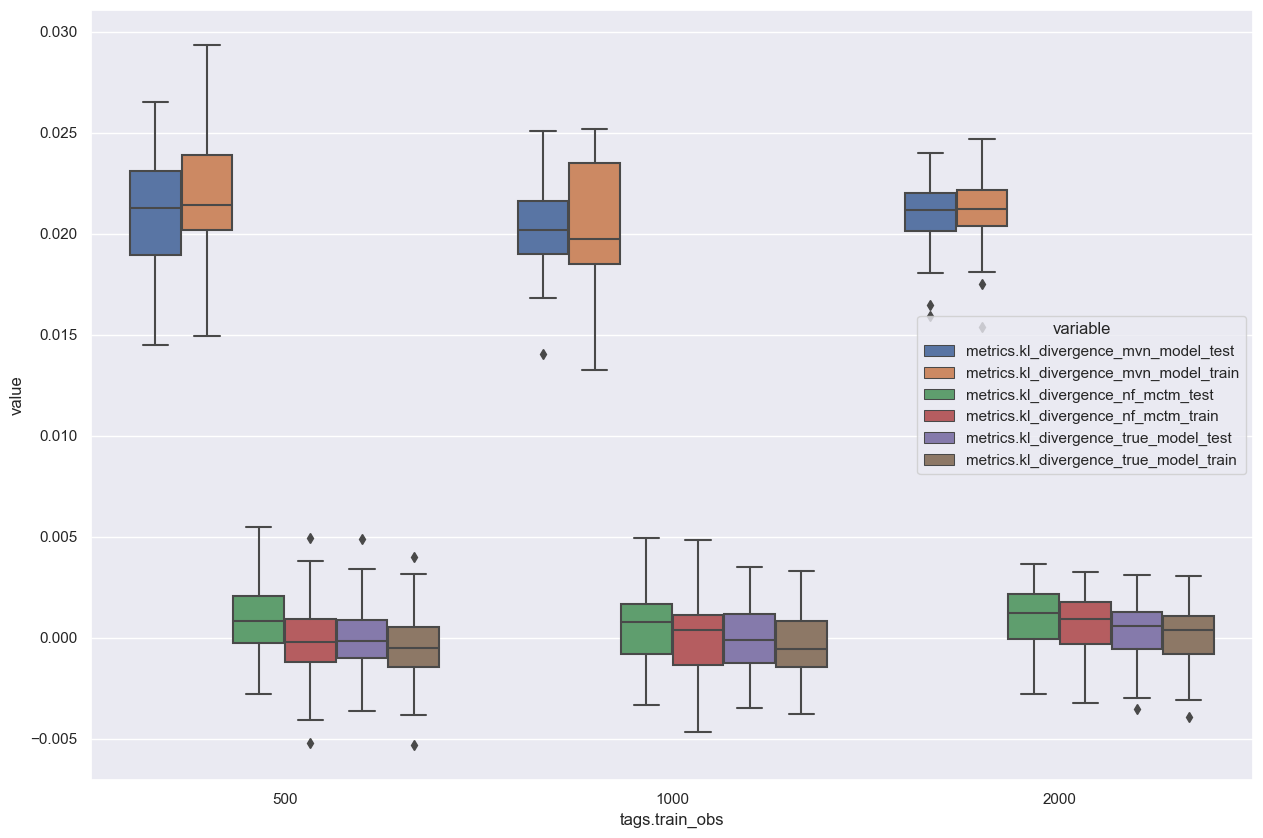

In [17]:
experiment_data = mlflow.search_runs(experiment_names=["joe_3_500","joe_3_1000","joe_3_2000"])
fig = plot_kl_boxplot(experiment_data)

#### Frank-Copula


- almost as good as the true model
- converges to the true model in terms of estimation variance and mean

---
- for small sample sizes multivariate gaussian is similar

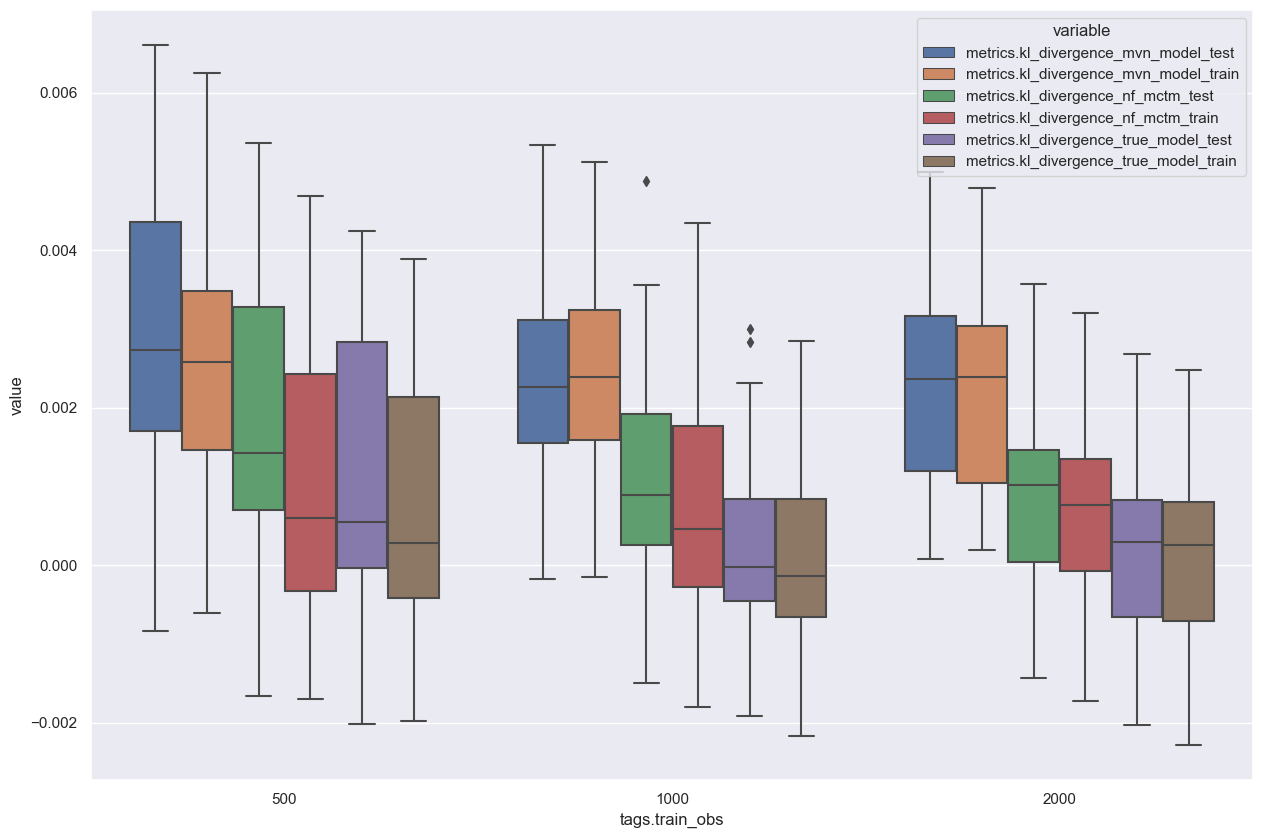

In [18]:
experiment_data = mlflow.search_runs(experiment_names=["frank_3_500","frank_3_1000","frank_3_2000"])
fig = plot_kl_boxplot(experiment_data)

# P-Value of Normality Test in the Latent Space

In [25]:
experiment_data = mlflow.search_runs(experiment_names=["t_3_500","t_3_1000","t_3_2000"])

In [26]:
# Incorrect number of observations for the runs of 1000 observations in t copula, I think I didnt push most current model code up to the server
id_t_3_1000 = experiment_metadata[experiment_metadata["name"]=="t_3_1000"]["experiment_id"].item()
index_false_rows = experiment_data[experiment_data["experiment_id"]==id_t_3_1000].index
experiment_data.loc[index_false_rows,"tags.train_obs"] = 1000

In [21]:
def plot_normality_pvalue_boxplot(experiment_data,log_scale=False):
    # Need twice as ootherwise we only have one list
    pval_columns = [column for column in experiment_data.columns if "pval" in column]
    pval_columns_and_train_obs = [column for column in experiment_data.columns if "pval" in column]

    pval_columns_and_train_obs.append("tags.train_obs")

    pval_data = experiment_data[pval_columns_and_train_obs]

    pval_data.loc[:,"tags.train_obs"] = pd.to_numeric(pval_data["tags.train_obs"])

    # all cols except tags.train_obs are reformatted intor a vallue and varaible column
    reformatted_pval_data = pval_data.melt(id_vars=['tags.train_obs'])

    # need to sort to have a sorted legend in seaborn plot
    pval_columns.sort()

    sns.set_theme()
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,10),
                                    gridspec_kw={'wspace':0.01, 'hspace':0.0})
    sns.boxplot(
        data=reformatted_pval_data, x="tags.train_obs", y='value', hue="variable",
        hue_order=pval_columns, ax=axs)
    if log_scale:
        axs.set_yscale("log")

    return fig

#### T-Copula


---
- only in the training set at merely 500 observations the model managed to get multivariate normality in the latent space

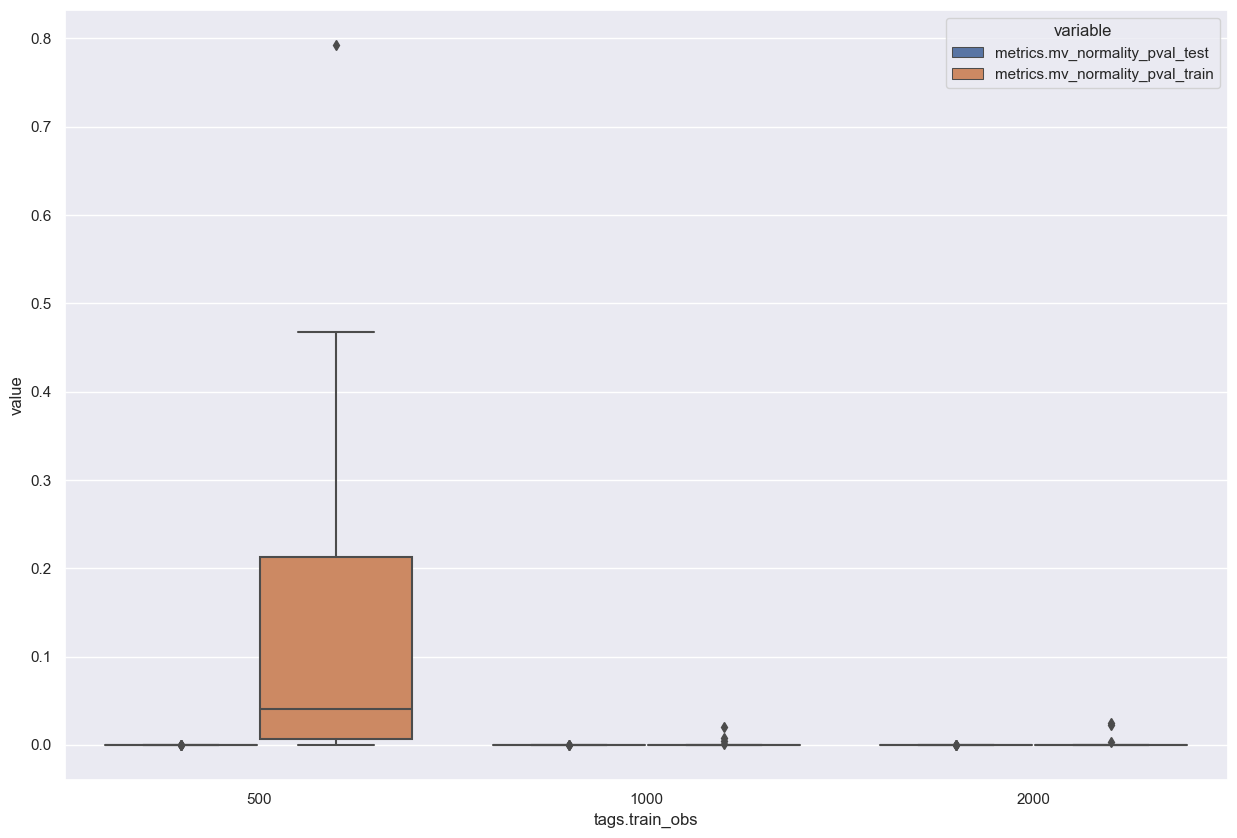

In [27]:
fig = plot_normality_pvalue_boxplot(experiment_data,log_scale=False)

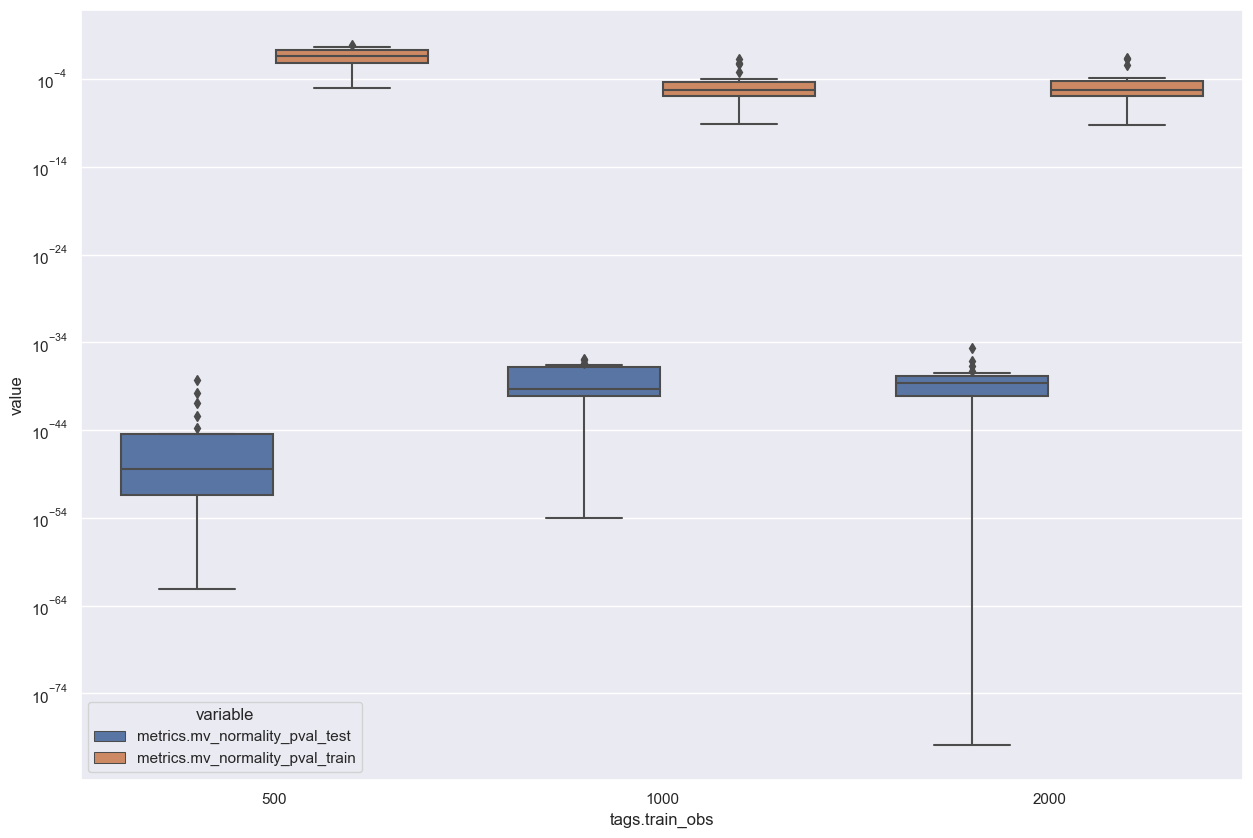

In [28]:
fig = plot_normality_pvalue_boxplot(experiment_data,log_scale=True)

#### Joe-Copula

- works well in the training set
- works better in test set for larger training sets

---
- fit quality deteriorates with increased sample

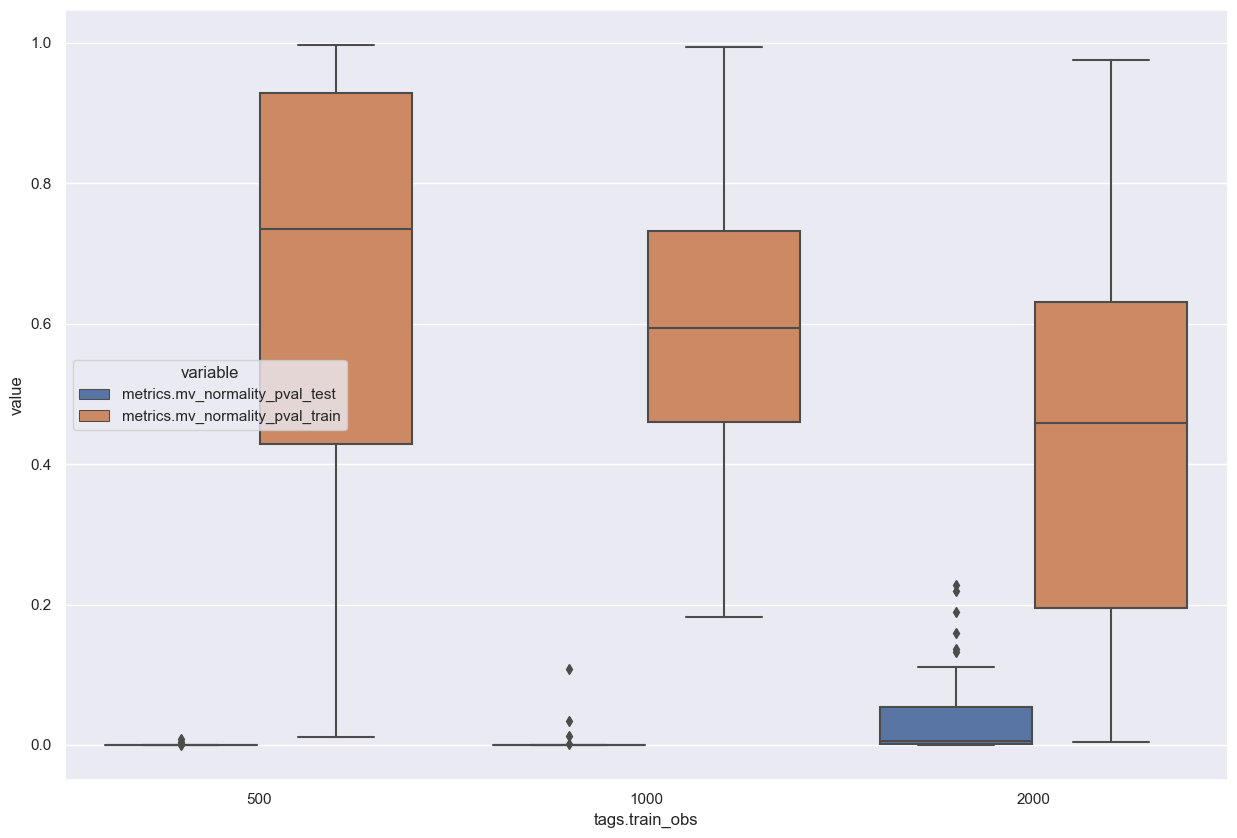

In [23]:
experiment_data = mlflow.search_runs(experiment_names=["joe_3_500","joe_3_1000","joe_3_2000"])
fig = plot_normality_pvalue_boxplot(experiment_data, log_scale=False)

#### Frank-Copula

- good fit in training
- remains stable over observation sizes

---
- only positive results in the test set for large samples

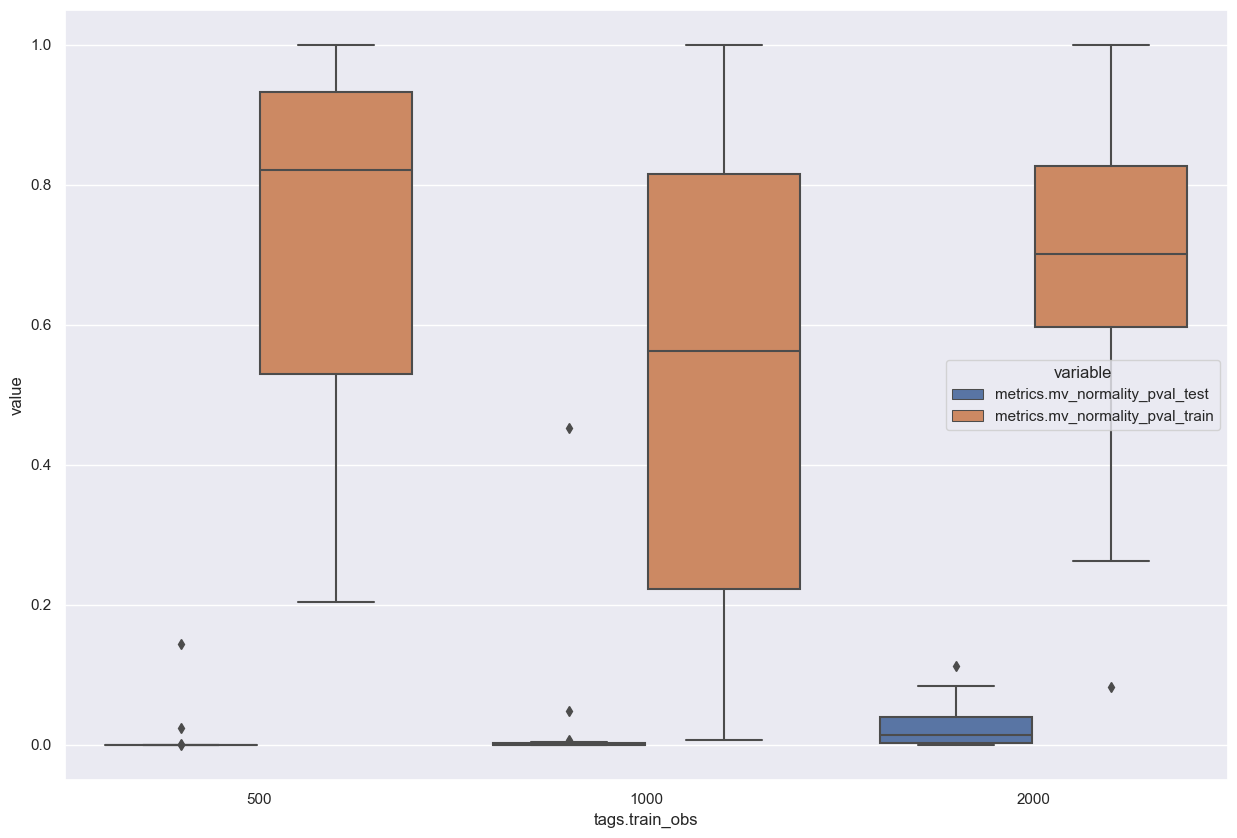

In [24]:
experiment_data = mlflow.search_runs(experiment_names=["frank_3_500","frank_3_1000","frank_3_2000"])
fig = plot_normality_pvalue_boxplot(experiment_data,log_scale=False)

# Questions

1. KL divergences are really small and we sometimes get negativ values (for the true and the nf-mctm models), is this an issue?
2. Is the comparison even meaningful? Should we not also include additional models, especially the vanilla mctm?
3. Is it an Issue that the latent space is often not normally distributed? (I believe this is a known issues from the ML generative model literature)
4. Lambda Penalization seemed not to work that well with optuna, it simply preferred small values. Without CV, isn't the chosen lambda then kind of arbitrary? (maybe need to study this more extensively, especially with the real world data, maybe there the CV results in a nonzero lambda penalisation. Further the issue might also be the sparse hyperparameter search)
    -
5. Covariate in the model: should we implement the tensor product version? (it is much slower as I couldnt find a 2D deBoor implementation, took lot of time thus stopped search). Further Real world data might not have a continious covariate